In [74]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW
from scipy import stats
df = pd.read_csv('./coquitlam.csv')

In [75]:
df.info

<bound method DataFrame.info of                 時間戳記 How long have you been a resident of Coquitlam?      Age  \
0    2024/7/12 11:48                                    3 to 5 years      <25   
1    2024/7/12 14:16                                    1 to 2 years      <25   
2    2024/7/13 16:04                                    Over 5 years  25 - 44   
3    2024/7/13 16:15                                Less than 1 year  25 - 44   
4    2024/7/13 16:25                                    Over 5 years      <25   
..               ...                                             ...      ...   
381  2024/7/13 18:28                                    3 to 5 years  25 - 44   
382  2024/7/13 17:01                                    Over 5 years  25 - 44   
383   2024/7/15 9:30                                    3 to 5 years      <25   
384  2024/7/13 17:38                                    3 to 5 years  25 - 44   
385  2024/7/13 16:04                                    Over 5 years  25 - 44

In [76]:
import matplotlib.pyplot as plt

In [77]:
df = pd.DataFrame(df) 

In [78]:
print("Column names:")
print(df.columns)

Column names:
Index(['時間戳記', 'How long have you been a resident of Coquitlam?', 'Age',
       'Gender', 'Employment Status', 'Annual Household Income',
       'Residency status', 'Education Level',
       'Have you ever used any of the following smart online initiatives implemented by Coquitlam?',
       'Have you chosen one or more smart initiatives in section 2?',
       'How satisfied are you with the online eServices (such as finding job on career.coquitlam.ca, shelter donation, renewing dog license, and utility bill payment)?',
       'How would you rate the ease-of-use access bill histories, property tax, utilities, and dog licenses through myCoquitlam website?',
       'Do you find the Curbside Collection mobile app’s features to be comprehensive and useful?  ',
       'How responsive do you find the Let’s Talk Coquitlam website when providing feedback or participating in community discussions?  ',
       'Do you feel that the free Wi-Fi provided in Coquitlam’s City parks and ci

In [79]:
# df=pd.read_csv("coquitlam.csv")
age_order = ['<25', '25 - 44', '45 - 64', '>64']
print(df['Age'].unique())
age_counts = df['Age'].value_counts().reindex(age_order)
print(age_counts)
l25 = age_counts['<25']
b2544 = age_counts['25 - 44']
b4564 = age_counts['45 - 64']
g64 = age_counts['>64']
# plot age_weights
total = df['Age'].size
age_weights = {
  '<25': 0.27 / (l25/total),
  '25 - 44': 0.276/(b2544/total),
  '45 - 64': 0.289 / (b4564/total),
  '>64': 0.163/(g64/total)
}
print(age_weights)
df['age_weight'] = df['Age'].map(age_weights)

['<25' '25 - 44' '>64' '45 - 64']
Age
<25         82
25 - 44    215
45 - 64     56
>64         33
Name: count, dtype: int64
{'<25': 1.2709756097560976, '25 - 44': 0.4955162790697675, '45 - 64': 1.9920357142857144, '>64': 1.9066060606060606}


In [80]:
# plot gender_weights
gender = ['Male', 'Female']
gender_counts = df['Gender'].value_counts()
male = gender_counts['Male']
female = gender_counts['Female']
gender_weights = {
  'Female': 0.509 / (female/total),
'Male' : 0.491 / (male/total)
}
print(gender_weights)
df['gender_weight'] = df['Gender'].map(gender_weights)


{'Female': 1.0233020833333333, 'Male': 0.9769381443298969}


In [81]:
privacy_ratings1 = df.iloc[:, 15]

In [82]:
privacy_ratings1 = privacy_ratings1.fillna(0)

In [83]:
privacy_ratings1 = privacy_ratings1[privacy_ratings1 != 0]

In [84]:
privacy_ratings1 = privacy_ratings1.astype(int)

In [85]:
rating_counts1 = privacy_ratings1.value_counts().sort_index()

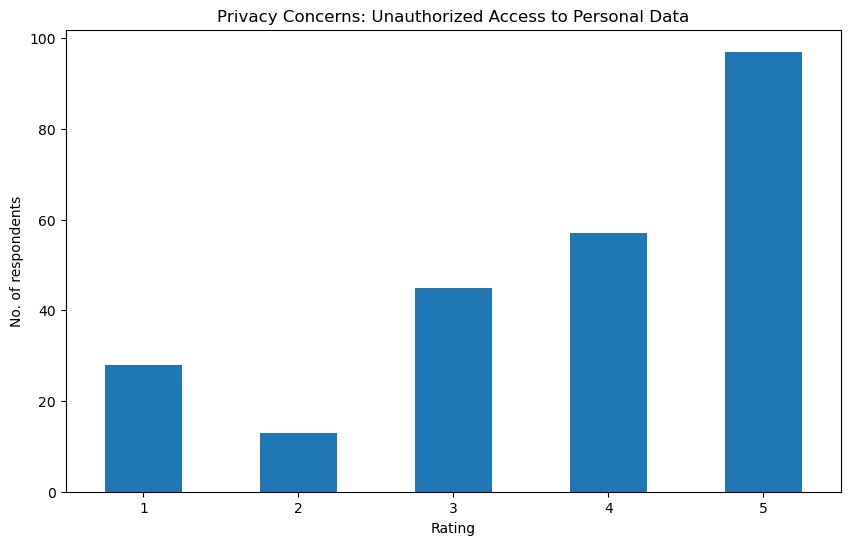

In [86]:
plt.figure(figsize=(10,6))
rating_counts1.plot(kind='bar')
plt.title('Privacy Concerns: Unauthorized Access to Personal Data')
plt.xlabel('Rating')
plt.ylabel('No. of respondents')
plt.xticks(rotation=0)
plt.show()

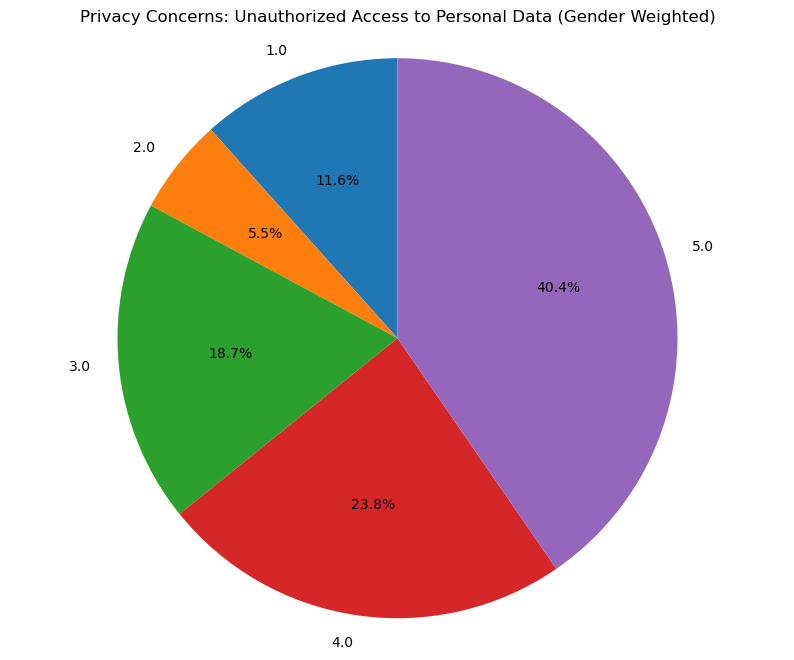

On a scale of 1 to 5, how concerned are you about the following privacy issues related to smart applications?  \n(1 = Not concerned at all, 5 = Extremely concerned)  [Unauthorized access to personal data]
1.0    27.956999
2.0    13.302927
3.0    44.889495
4.0    57.261848
5.0    97.220289
Name: gender_weight, dtype: float64


In [87]:
import matplotlib.pyplot as plt

weighted_freq = df.groupby(privacy_ratings1)['gender_weight'].sum().sort_index()

plt.figure(figsize=(10,8))
plt.pie(weighted_freq.values, labels=weighted_freq.index, autopct='%1.1f%%', startangle=90)
plt.title('Privacy Concerns: Unauthorized Access to Personal Data (Gender Weighted)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

print(weighted_freq)

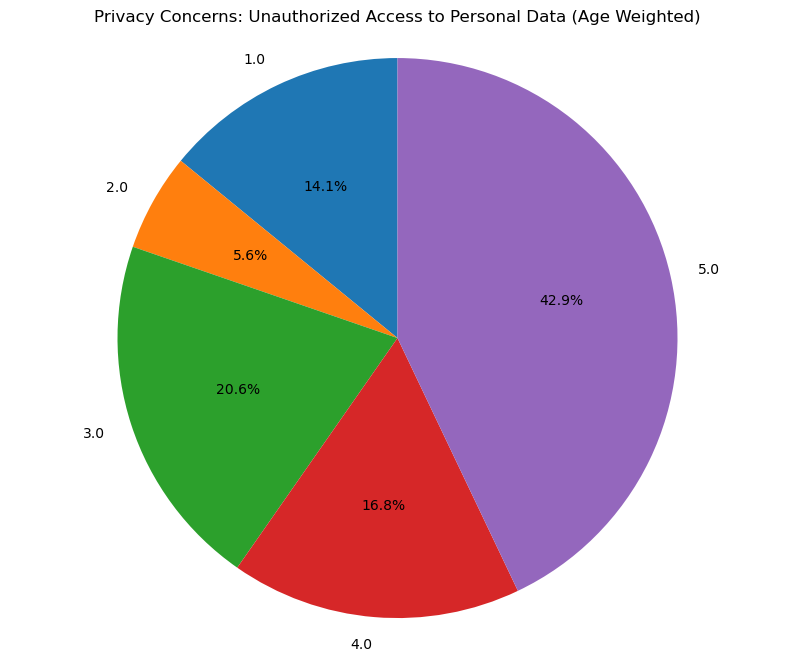

On a scale of 1 to 5, how concerned are you about the following privacy issues related to smart applications?  \n(1 = Not concerned at all, 5 = Extremely concerned)  [Unauthorized access to personal data]
1.0    29.723908
2.0    11.869927
3.0    43.436071
4.0    35.385306
5.0    90.566015
Name: age_weight, dtype: float64


In [88]:

weighted_freq = df.groupby(privacy_ratings1)['age_weight'].sum().sort_index()

plt.figure(figsize=(10,8))
plt.pie(weighted_freq.values, labels=weighted_freq.index, autopct='%1.1f%%', startangle=90)
plt.title('Privacy Concerns: Unauthorized Access to Personal Data (Age Weighted)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

print(weighted_freq)

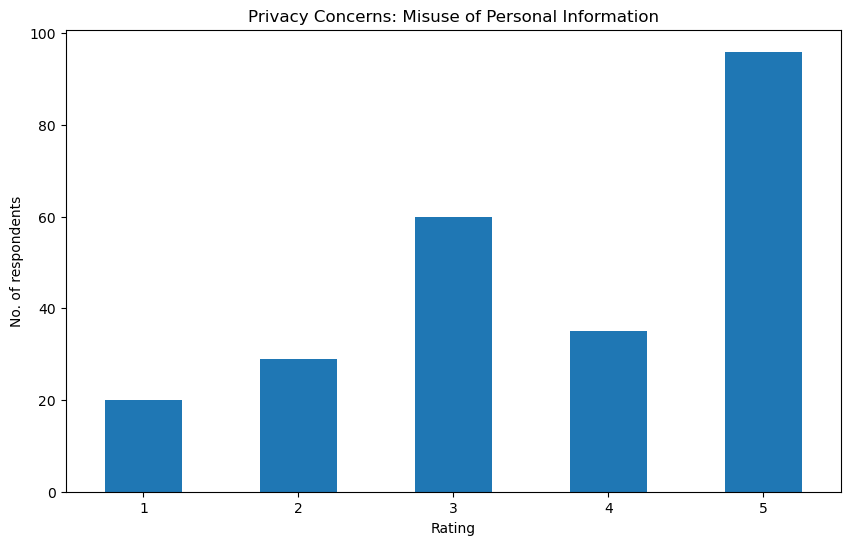

In [89]:
privacy_ratings2 = df.iloc[:, 16]
privacy_ratings2 = privacy_ratings2.fillna(0)
privacy_ratings2 = privacy_ratings2[privacy_ratings2 != 0]
privacy_ratings2 = privacy_ratings2.astype(int)
rating_counts2 = privacy_ratings2.value_counts().sort_index()
plt.figure(figsize=(10,6))
rating_counts2.plot(kind='bar')

plt.title('Privacy Concerns: Misuse of Personal Information')
plt.xlabel('Rating')
plt.ylabel('No. of respondents')
plt.xticks(rotation=0)
plt.show()

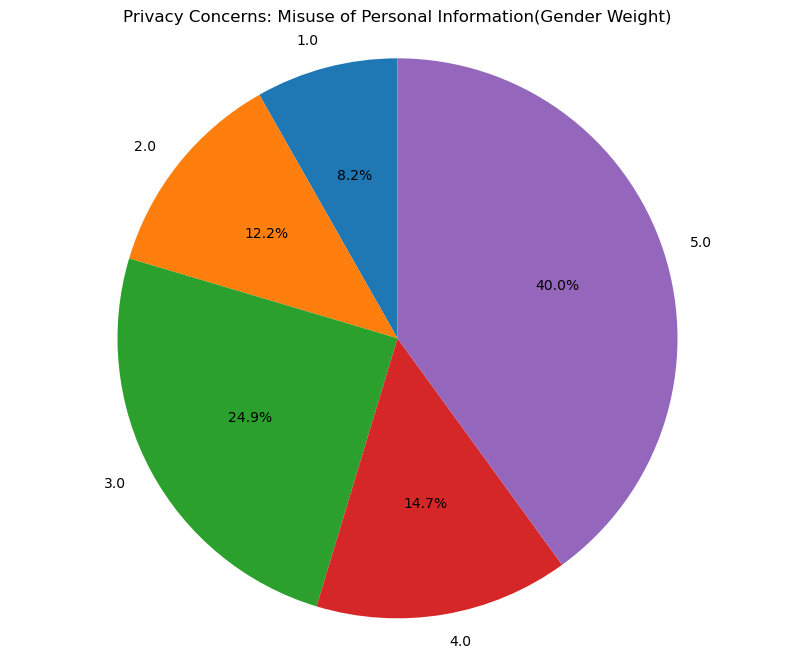

On a scale of 1 to 5, how concerned are you about the following privacy issues related to smart applications?  \n(1 = Not concerned at all, 5 = Extremely concerned)  [Misuse of personal information]
1.0    19.770583
2.0    29.304849
3.0    60.007207
4.0    35.305570
5.0    96.243351
Name: gender_weight, dtype: float64


In [90]:

weighted_freq = df.groupby(privacy_ratings2)['gender_weight'].sum().sort_index()
plt.figure(figsize=(10,8))
plt.pie(weighted_freq.values, labels=weighted_freq.index, autopct='%1.1f%%', startangle=90)
plt.title('Privacy Concerns: Misuse of Personal Information(Gender Weight)')
plt.axis('equal')
plt.show()

print(weighted_freq)

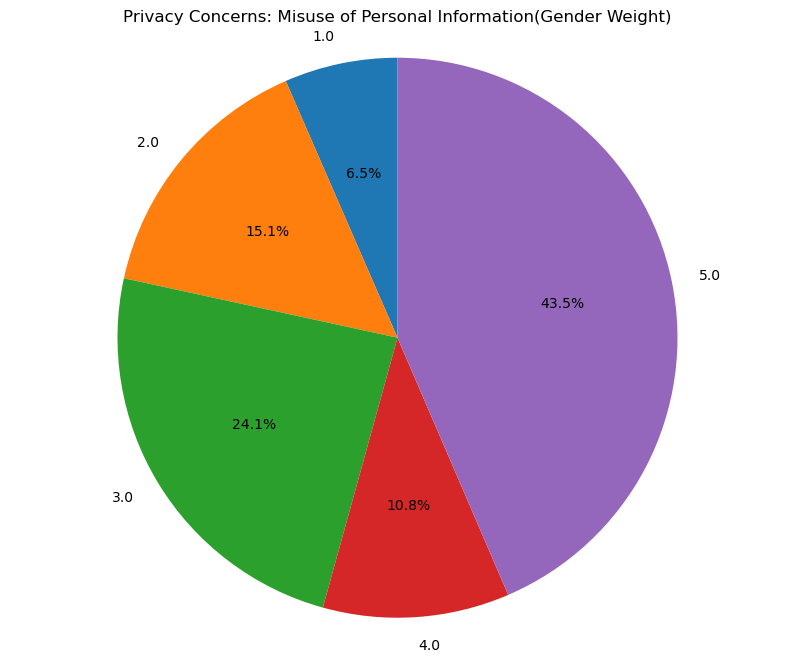

On a scale of 1 to 5, how concerned are you about the following privacy issues related to smart applications?  \n(1 = Not concerned at all, 5 = Extremely concerned)  [Misuse of personal information]
1.0    13.787622
2.0    31.770343
3.0    50.868815
4.0    22.716886
5.0    91.837561
Name: age_weight, dtype: float64


In [91]:

weighted_freq = df.groupby(privacy_ratings2)['age_weight'].sum().sort_index()
weighted_freq
plt.figure(figsize=(10,8))
plt.pie(weighted_freq.values, labels=weighted_freq.index, autopct='%1.1f%%', startangle=90)
plt.title('Privacy Concerns: Misuse of Personal Information(Gender Weight)')
plt.axis('equal')
plt.show()

print(weighted_freq)

In [92]:
privacy_ratings2 = pd.to_numeric(privacy_ratings2, errors='coerce')
print(df.iloc[:, 16].name)

df_clean = df.dropna(subset=['Age', df.iloc[:, 16].name, 'age_weight'])

age_groups = df_clean['Age'].unique()
print(age_groups)
group_data = [df_clean[df_clean['Age'] == age][df.iloc[:, 16].name] for age in age_groups]
group_weights = [df_clean[df_clean['Age'] == age]['age_weight'] for age in age_groups]

f_statistic, p_value = stats.f_oneway(*[DescrStatsW(data, weights=weights).data for data, weights in zip(group_data, group_weights)])

print("One-way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

for age, data, weights in zip(age_groups, group_data, group_weights):
    weighted_mean = np.average(data, weights=weights)
    print(f"Weighted mean for {age}: {weighted_mean}")

On a scale of 1 to 5, how concerned are you about the following privacy issues related to smart applications?  
(1 = Not concerned at all, 5 = Extremely concerned)  [Misuse of personal information]
['<25' '25 - 44' '45 - 64' '>64']
One-way ANOVA results:
F-statistic: 1.1672463282626728
p-value: 0.32292716686392164
Weighted mean for <25: 3.4999999999999996
Weighted mean for 25 - 44: 3.643312101910827
Weighted mean for 45 - 64: 3.7941176470588234
Weighted mean for >64: 4.6000000000000005


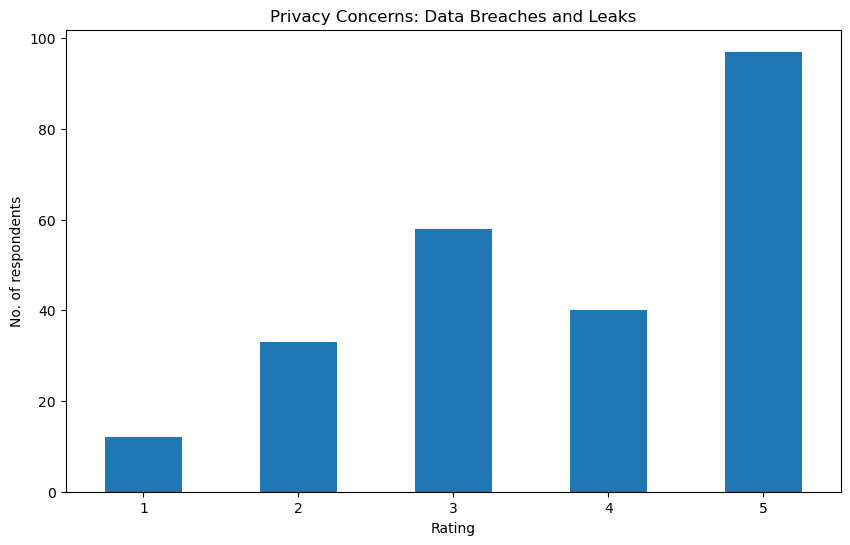

In [14]:
privacy_ratings3 = df.iloc[:, 17]
privacy_ratings3 = privacy_ratings3.fillna(0)
privacy_ratings3 = privacy_ratings3[privacy_ratings3 != 0]
privacy_ratings3 = privacy_ratings3.astype(int)
rating_counts3 = privacy_ratings3.value_counts().sort_index()
plt.figure(figsize=(10,6))
rating_counts3.plot(kind='bar')

plt.title('Privacy Concerns: Data Breaches and Leaks')
plt.xlabel('Rating')
plt.ylabel('No. of respondents')
plt.xticks(rotation=0)
plt.show()

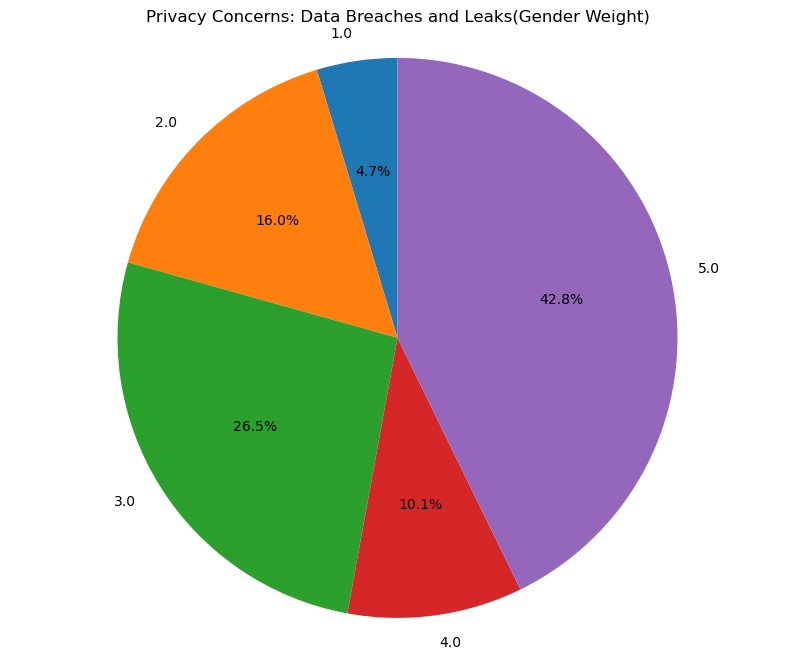

In [48]:

weighted_freq = df.groupby(privacy_ratings3)['age_weight'].sum().sort_index()
weighted_freq
plt.figure(figsize=(10,8))
plt.pie(weighted_freq.values, labels=weighted_freq.index, autopct='%1.1f%%', startangle=90)
plt.title('Privacy Concerns: Data Breaches and Leaks(Age Weight)')
plt.axis('equal')
plt.show()

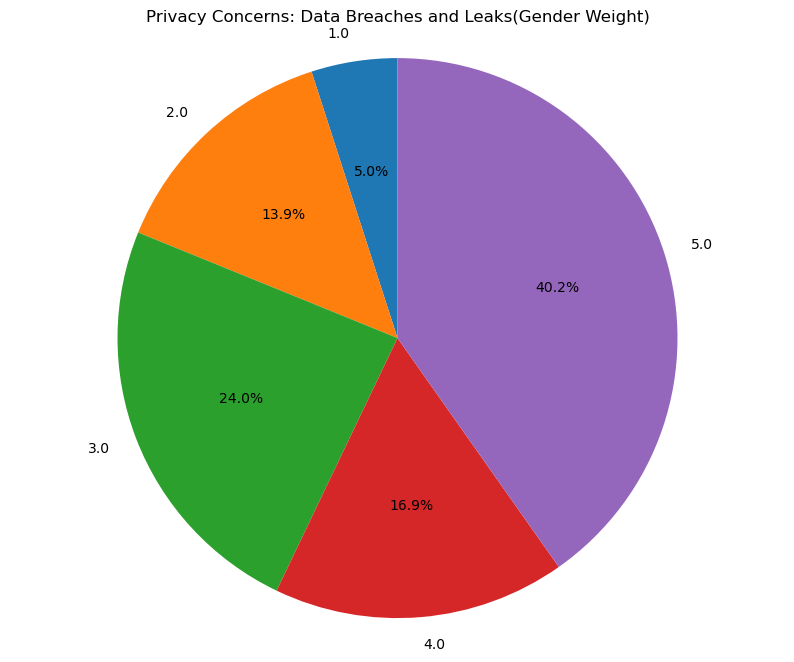

In [49]:

weighted_freq = df.groupby(privacy_ratings3)['gender_weight'].sum().sort_index()
weighted_freq
plt.figure(figsize=(10,8))
plt.pie(weighted_freq.values, labels=weighted_freq.index, autopct='%1.1f%%', startangle=90)
plt.title('Privacy Concerns: Data Breaches and Leaks(Gender Weight)')
plt.axis('equal')
plt.show()

In [50]:
df_with_dummies = pd.get_dummies(df, columns=['gender_weight'], drop_first=True)
df_with_dummies

,時間戳記,How long have you been a resident of Coquitlam?,Age,Gender,Employment Status,Annual Household Income,Residency status,Education Level,Have you ever used any of the following smart online initiatives implemented by Coquitlam?,Have you chosen one or more smart initiatives in section 2?,...,"On average, how often do you use smart online initiatives (from Section 2) provided by the City of Coquitlam (e.g., public transportation apps, utility management apps, public service apps)?","To what extent do you agree with the following statement: ""Smart online initiatives provided by the City of Coquitlam have improved my overall quality of life.""",How easy do you find it to use the smart online initiatives provided by the City of Coquitlam?,"To what extent do online initiatives provided by the City of Coquitlam help you in managing your daily activities (e.g., commuting, paying bills, accessing city services)?",How satisfied are you with the services provided by the online initiatives offered by the City of Coquitlam?,What are the reasons that discourage you from using or make you use the smart applications less frequently? (Select all that apply),What improvements would encourage you to use Coquitlam's smart online initiatives more frequently? (Select all that apply),Do you have any additional comments or suggestions regarding the use of smart applications in Coquitlam's smart city initiatives?,age_weight,gender_weight_1.0233020833333333
0,2024/7/12 11:48,3 to 5 years,<25,Male,Student without a part-time job,Prefer not to say,Student Visa,Postgraduate degree,"Paying utility bills through eService, Accessi...",Yes,...,Weekly,Agree,Neutral,Agree,Satisfied,Lack of awareness,"More user-friendly navigation, Better customer...",NaN,1.270976,False
1,2024/7/12 14:16,1 to 2 years,<25,Male,Student without a part-time job,"Less than $25,000",Student Visa,Some college or university,Searching for jobs in eService through the Coq...,Yes,...,Monthly,Agree,Easy,Agree,Satisfied,"Concerns about privacy, Concerns about security","Better interface, More comprehensive features,...",NaN,1.270976,False
2,2024/7/13 16:04,Over 5 years,25 - 44,Female,Student without a part-time job,Prefer not to say,Citizen,High school diploma or equivalent,"Viewing active, open, and closed projects on t...",Yes,...,Weekly,Agree,Easy,Agree,Satisfied,"Not useful, Lack of awareness, Concerns about ...","More comprehensive features, Enhanced security...",Less time spending online,0.495516,True
3,2024/7/13 16:15,Less than 1 year,25 - 44,Female,Unemployed,"Less than $25,000",Student Visa,High school diploma or equivalent,None of the above.,No,...,Daily,Neutral,Neutral,Neutral,Neutral,Concerns about privacy,More comprehensive features,NaN,0.495516,True
4,2024/7/13 16:25,Over 5 years,<25,Female,Full time employed,"$50,000 - $74,999",Citizen,Bachelor's degree,Accessing free Wi-Fi in city parks or civic fa...,Yes,...,Rarely,Neutral,Neutral,Neutral,Neutral,"Lack of awareness, Concerns about privacy, Con...",Increased awareness and education about the in...,NaN,1.270976,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,2024/7/13 18:28,3 to 5 years,25 - 44,Male,Student with a part-time job,"$25,000 - $49,999",Student Visa,Postgraduate degree,Renewing dog licenses through the eService web...,Yes,...,Monthly,Neutral,Neutral,Agree,Neutral,"Lack of awareness, Concerns about privacy, Pre...","More comprehensive features, Improved privacy ...",NaN,0.495516,False
382,2024/7/13 17:01,Over 5 years,25 - 44,Male,Full time employed,"$150,000 - $199,999",Citizen,Bachelor's degree,Searching for jobs in eService through the Coq...,Yes,...,Rarely,Neutral,Easy,Neutral,Satisfied,"Not useful, Preference for traditional methods","Enhanced security measures, Improved privacy p...",NaN,0.495516,False
383,2024/7/15 9:30,3 to 5 years,<25,Male,Student without a part-time job,Prefer not to say,Student Visa,Postgraduate degree,None of the above.,No,...,Weekly,Agr

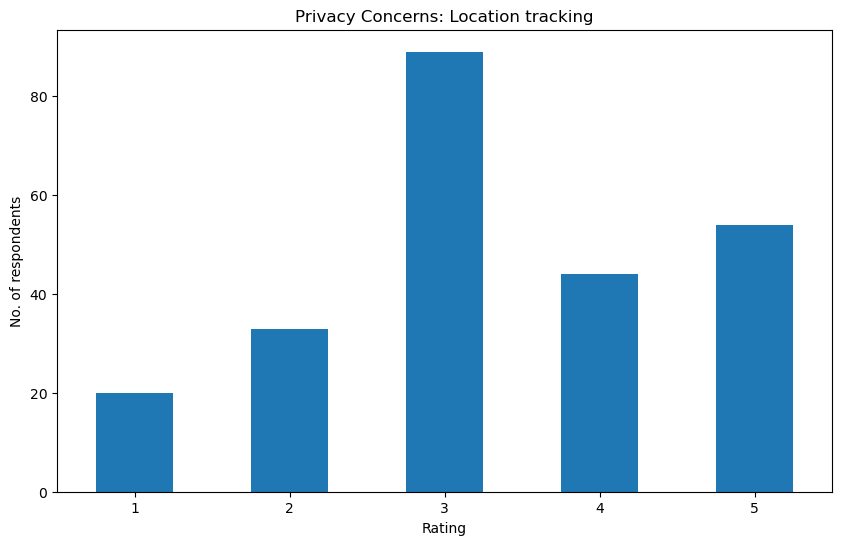

In [15]:
privacy_ratings4 = df.iloc[:, 18]
privacy_ratings4 = privacy_ratings4.fillna(0)
privacy_ratings4 = privacy_ratings4[privacy_ratings4 != 0]
privacy_ratings4 = privacy_ratings4.astype(int)
rating_counts4 = privacy_ratings4.value_counts().sort_index()
plt.figure(figsize=(10,6))
rating_counts4.plot(kind='bar')

plt.title('Privacy Concerns: Location tracking')
plt.xlabel('Rating')
plt.ylabel('No. of respondents')
plt.xticks(rotation=0)
plt.show()

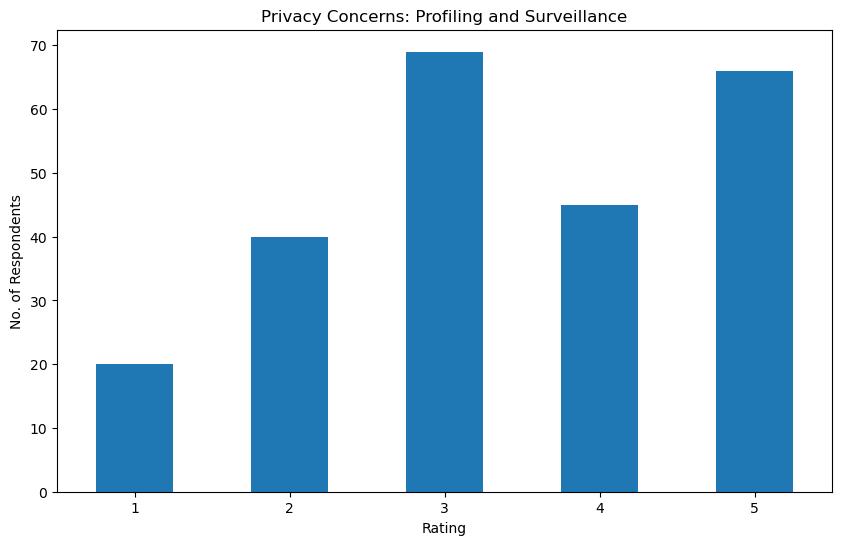

In [16]:
privacy_ratings5 = df.iloc[:, 19]
privacy_ratings5 = privacy_ratings5.fillna(0)
privacy_ratings5 = privacy_ratings5[privacy_ratings5 != 0]
privacy_ratings5 = privacy_ratings5.astype(int)
rating_counts5 = privacy_ratings5.value_counts().sort_index()
plt.figure(figsize=(10,6))
rating_counts5.plot(kind='bar')

plt.title('Privacy Concerns: Profiling and Surveillance')
plt.xlabel('Rating')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

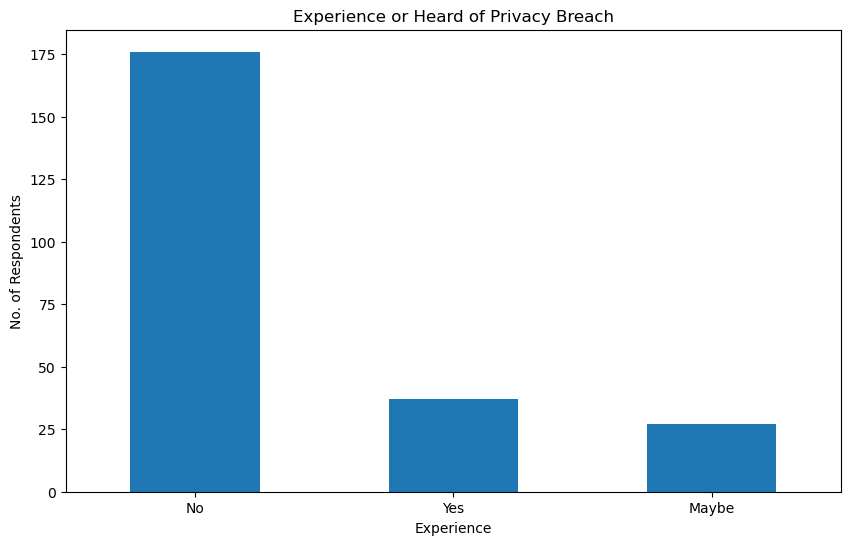

In [17]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'Have you ever experienced or heard of a privacy breach related to smart applications in Coquitlam?'
respond_counts = df[r].value_counts()
respond = ['Yes', 'No', 'Maybe']
yes = respond_counts['Yes']
no = respond_counts['No']
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Experience or Heard of Privacy Breach')
plt.xlabel('Experience')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

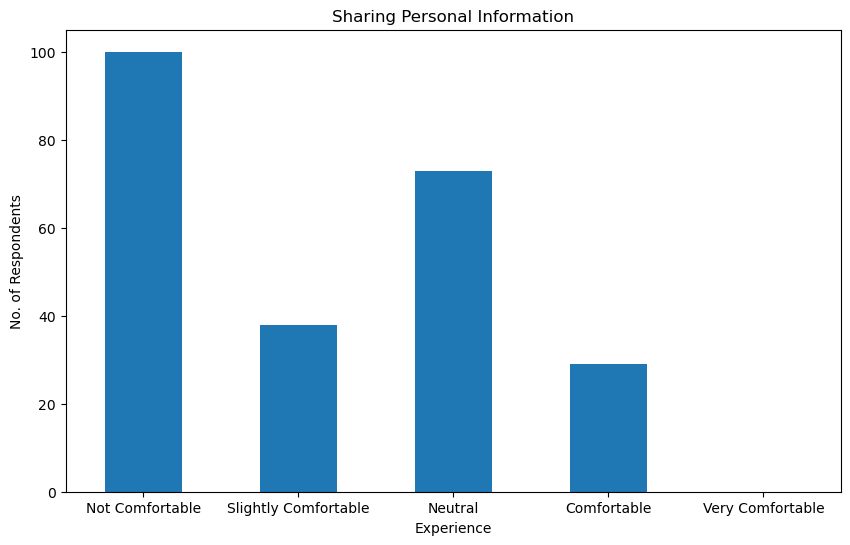

In [18]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'How comfortable are you with sharing personal information (e.g., location, health data)  with smart applications to access smart city services?'
respond_counts = df[r].value_counts()
respond = ['Not Comfortable', 'Slightly Comfortable', 'Neutral', 'Comfortable', 'Very Comfortable']
# Not_Comfortable = respond_counts['Not Comfortable']
# Slightly_Comfortable  = respond_counts['Slightly Comfortable']
# Neutral = respond_counts['Neutral']
# Comfortable = respond_counts['Comfortable']
# Very_Comfortable = respond_counts['Very Comfortable']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Sharing Personal Information')
plt.xlabel('Experience')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

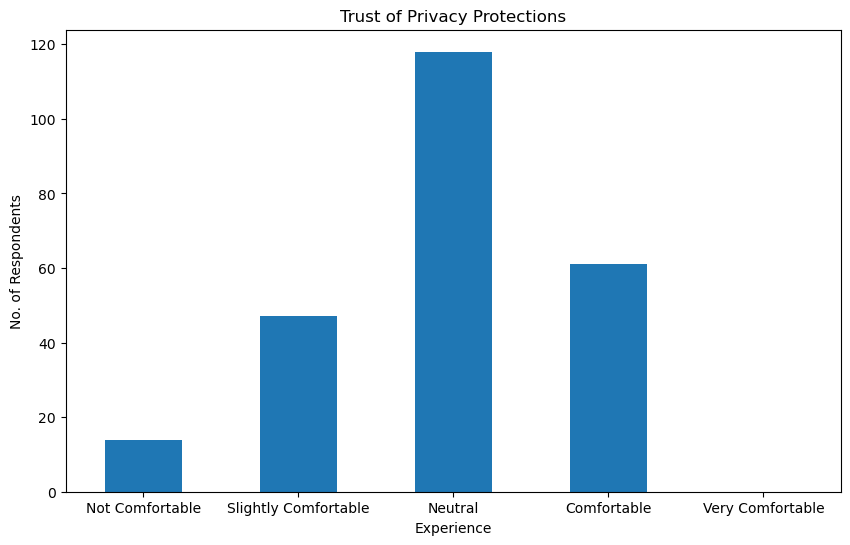

In [19]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'To what extent do you trust the city of Coquitlam and service providers to protect your privacy when using smart applications?'
respond_counts = df[r].value_counts()
respond = ['Not Comfortable', 'Slightly Comfortable', 'Neutral', 'Comfortable', 'Very Comfortable']
# Not_Comfortable = respond_counts['Not Comfortable']
# Slightly_Comfortable  = respond_counts['Slightly Comfortable']
# Neutral = respond_counts['Neutral']
# Comfortable = respond_counts['Comfortable']
# Very_Comfortable = respond_counts['Very Comfortable']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Trust of Privacy Protections')
plt.xlabel('Experience')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

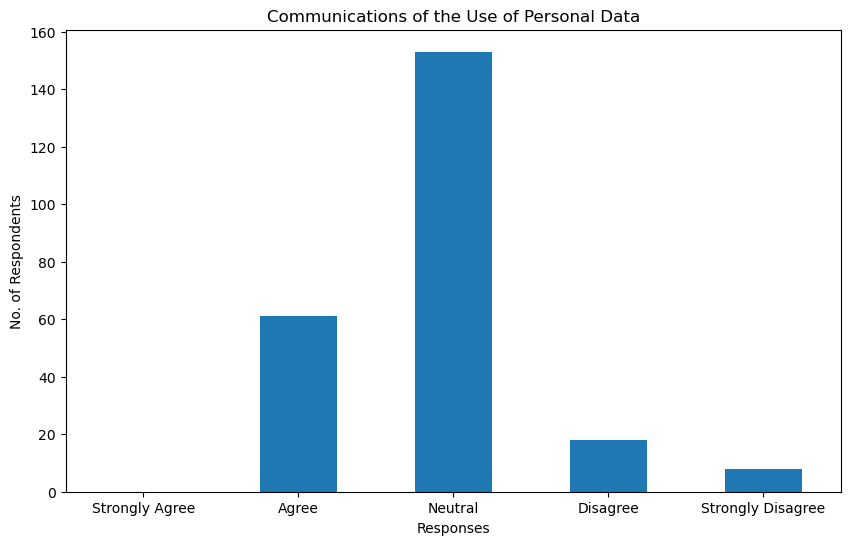

In [20]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'Do you feel that smart applications in Coquitlam clearly communicate how your personal data will be used?'
respond_counts = df[r].value_counts()
respond = ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']
# Not_Comfortable = respond_counts['Not Comfortable']
# Slightly_Comfortable  = respond_counts['Slightly Comfortable']
# Neutral = respond_counts['Neutral']
# Comfortable = respond_counts['Comfortable']
# Very_Comfortable = respond_counts['Very Comfortable']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Communications of the Use of Personal Data')
plt.xlabel('Responses')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

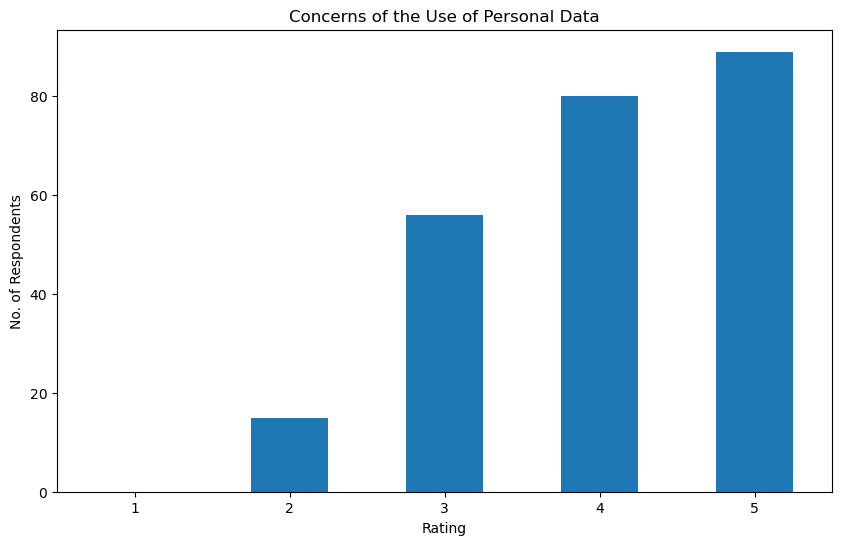

In [21]:
r = df.iloc[:, 24]
r = r.fillna(0)
r = r[r != 0]
r = r.astype(int)
respond = [1,2,3,4,5]
respond_counts = r.value_counts().reindex(respond, fill_value=0).sort_index()
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Concerns of the Use of Personal Data')
plt.xlabel('Rating')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

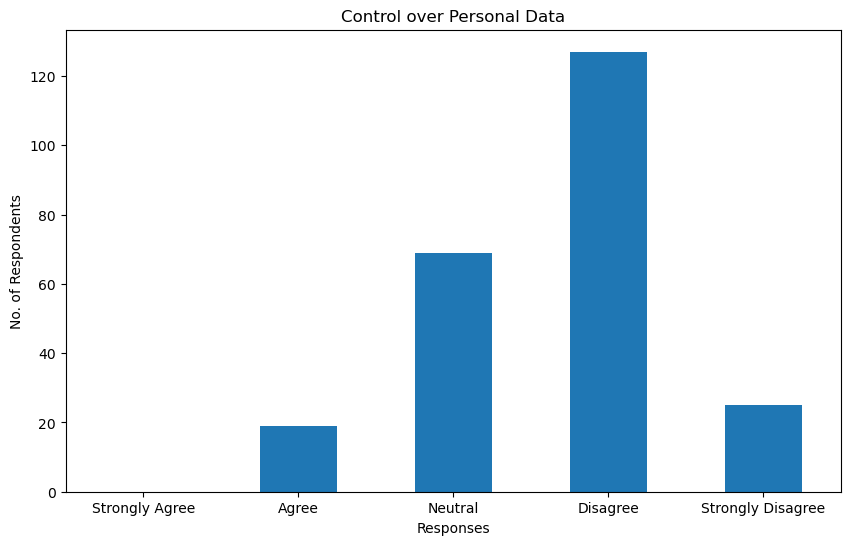

In [22]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'Do you feel you have enough control over the personal data that smart applications collect from you?'
respond_counts = df[r].value_counts()
respond = ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Control over Personal Data')
plt.xlabel('Responses')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

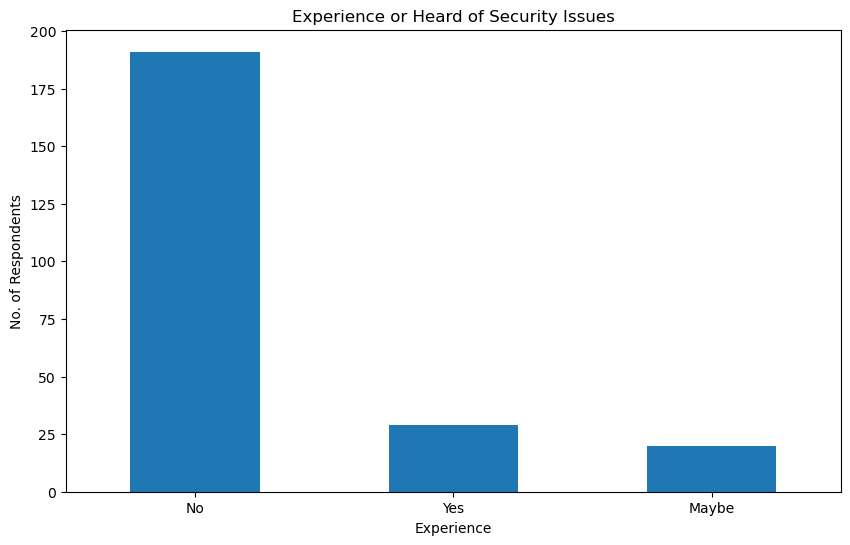

In [23]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'Have you ever experienced or heard of a security issue related to smart applications in Coquitlam?'
respond_counts = df[r].value_counts()
respond = ['Yes', 'No', 'Maybe']
yes = respond_counts['Yes']
no = respond_counts['No']
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Experience or Heard of Security Issues')
plt.xlabel('Experience')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

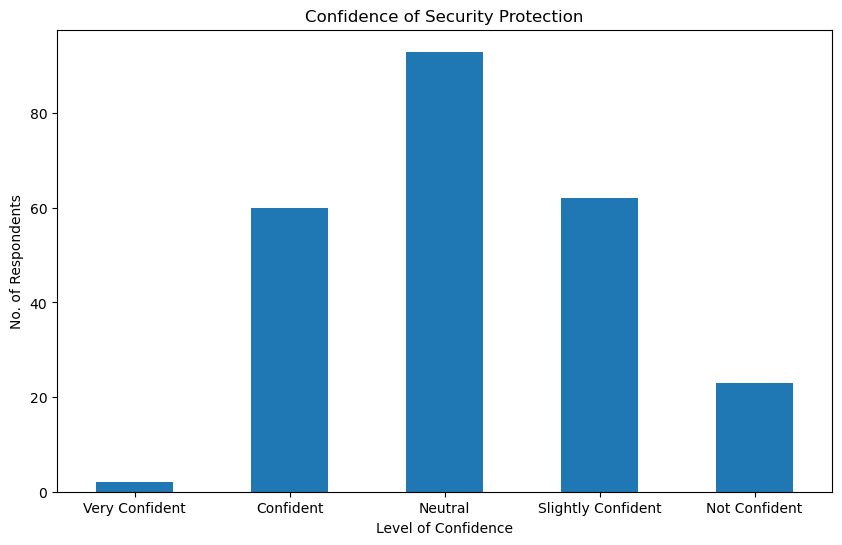

In [24]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'How confident are you that smart applications in Coquitlam have adequate measures in place to protect your data from breaches?'
respond_counts = df[r].value_counts()
respond = ['Very Confident', 'Confident', 'Neutral', 'Slightly Confident', 'Not Confident']
# Not_Comfortable = respond_counts['Not Comfortable']
# Slightly_Comfortable  = respond_counts['Slightly Comfortable']
# Neutral = respond_counts['Neutral']
# Comfortable = respond_counts['Comfortable']
# Very_Comfortable = respond_counts['Very Comfortable']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Confidence of Security Protection')
plt.xlabel('Level of Confidence')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

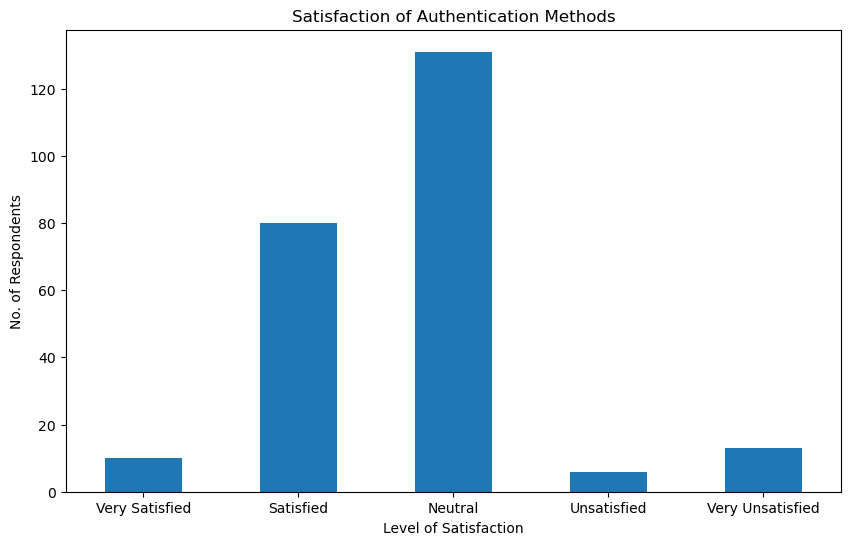

In [25]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'Are you satisfied with the authentication methods used by smart applications to verify your identity?'
respond_counts = df[r].value_counts()
respond = ['Very Satisfied', 'Satisfied', 'Neutral', 'Unsatisfied', 'Very Unsatisfied']
# Not_Comfortable = respond_counts['Not Comfortable']
# Slightly_Comfortable  = respond_counts['Slightly Comfortable']
# Neutral = respond_counts['Neutral']
# Comfortable = respond_counts['Comfortable']
# Very_Comfortable = respond_counts['Very Comfortable']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Satisfaction of Authentication Methods')
plt.xlabel('Level of Satisfaction')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

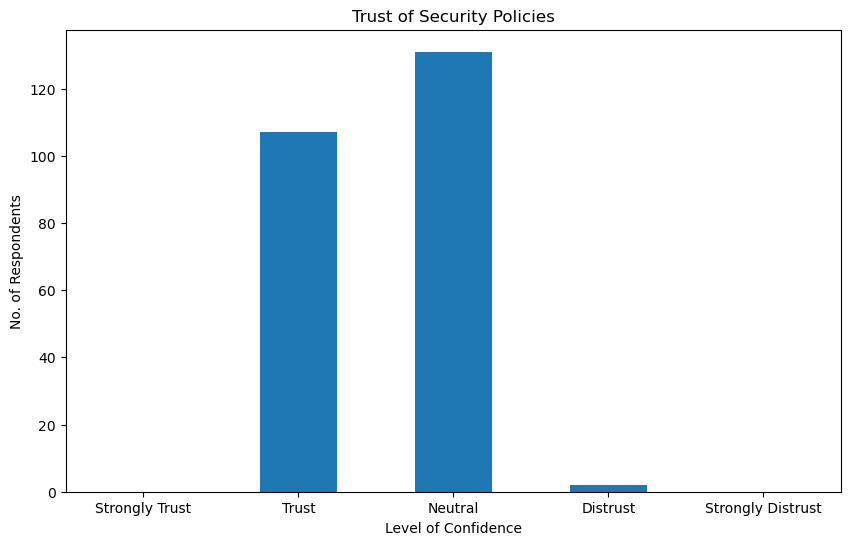

In [26]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'Do you trust the security policies of smart applications in Coquitlam?'
respond_counts = df[r].value_counts()
respond = ['Strongly Trust', 'Trust', 'Neutral', 'Distrust', 'Strongly Distrust']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Trust of Security Policies')
plt.xlabel('Level of Confidence')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

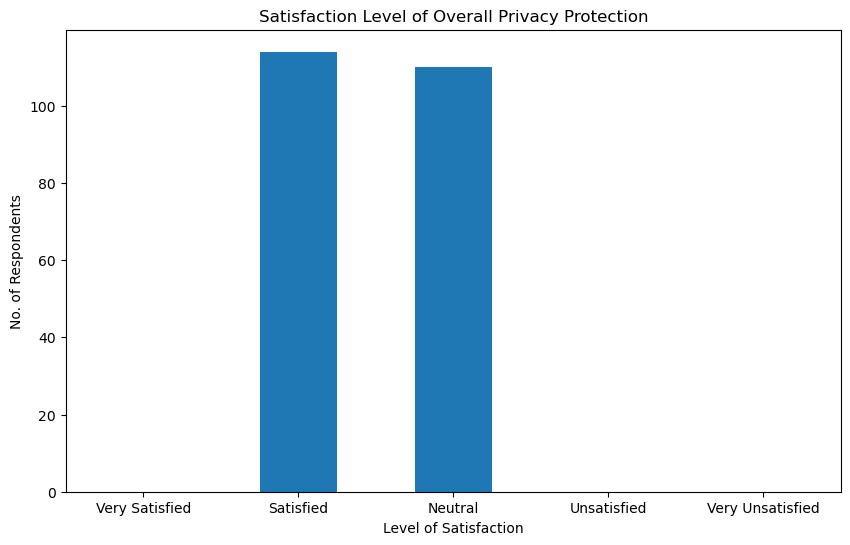

In [27]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'How satisfied are you with the overall privacy protection provided by smart applications in Coquitlam?'
respond_counts = df[r].value_counts()
respond = ['Very Satisfied', 'Satisfied', 'Neutral', 'Unsatisfied', 'Very Unsatisfied']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Satisfaction Level of Overall Privacy Protection')
plt.xlabel('Level of Satisfaction')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

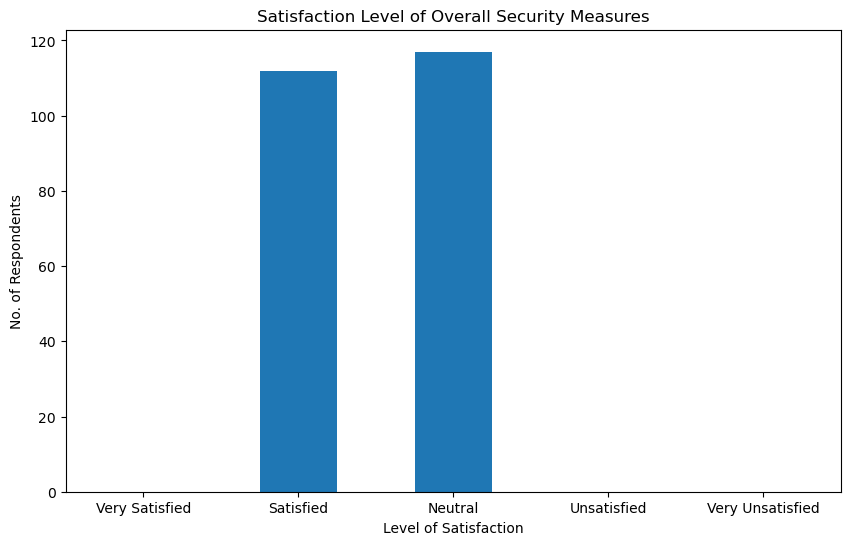

In [28]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'How satisfied are you with the overall security measures implemented by smart applications in Coquitlam?'
respond_counts = df[r].value_counts()
respond = ['Very Satisfied', 'Satisfied', 'Neutral', 'Unsatisfied', 'Very Unsatisfied']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Satisfaction Level of Overall Security Measures')
plt.xlabel('Level of Satisfaction')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

Mean rating: 3.7583333333333333
Median rating: 4.0
Mode rating: 5


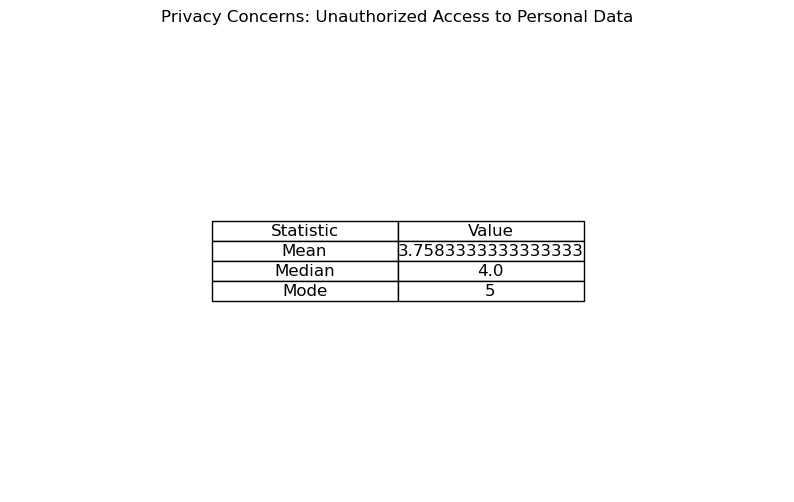

In [29]:
r = df.iloc[:, 15]

# Clean the data: fill NA values with 0, remove rows with 0 ratings, convert to integers
r = r.fillna(0)
r = r[r != 0]
r = r.astype(int)

# Calculate mean, median, and mode
mean_rating = r.mean()
median_rating = r.median()
mode_rating = r.mode()[0]  # mode() returns a Series, take the first mode

# Display the statistics
print(f"Mean rating: {mean_rating}")
print(f"Median rating: {median_rating}")
print(f"Mode rating: {mode_rating}")

# Optionally, you can display these statistics in a simple plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table_data = [
    ["Statistic", "Value"],
    ["Mean", mean_rating],
    ["Median", median_rating],
    ["Mode", mode_rating]
]
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2])

# Customize the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Display the table
plt.title('Privacy Concerns: Unauthorized Access to Personal Data')
plt.show()

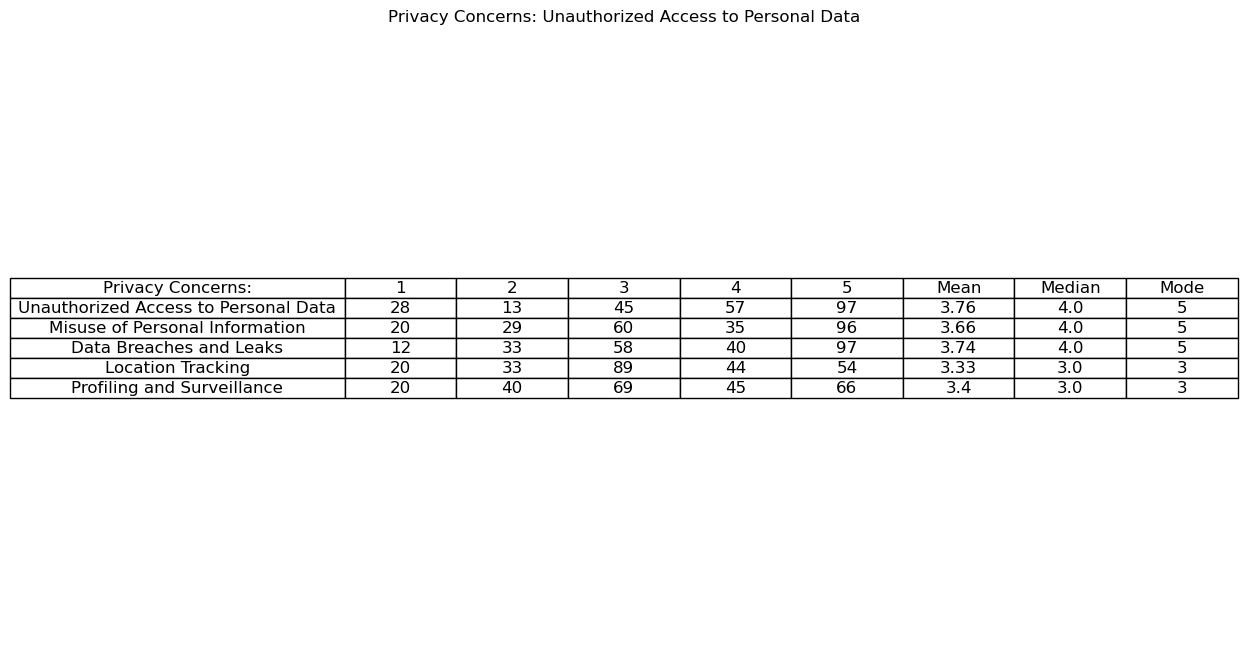

                      Privacy Concerns:   1   2   3   4   5  Mean  Median  \
0  Unauthorized Access to Personal Data  28  13  45  57  97  3.76     4.0   
1        Misuse of Personal Information  20  29  60  35  96  3.66     4.0   
2               Data Breaches and Leaks  12  33  58  40  97  3.74     4.0   
3                     Location Tracking  20  33  89  44  54  3.33     3.0   
4            Profiling and Surveillance  20  40  69  45  66  3.40     3.0   

   Mode  
0     5  
1     5  
2     5  
3     3  
4     3  


In [30]:
# Extract the relevant columns (columns 15 to 19)
columns = df.iloc[:, 15:20]

# Rename the columns
new_column_names = {
    columns.columns[0]: 'Unauthorized Access to Personal Data',
    columns.columns[1]: 'Misuse of Personal Information',
    columns.columns[2]: 'Data Breaches and Leaks',
    columns.columns[3]: 'Location Tracking',
    columns.columns[4]: 'Profiling and Surveillance'
}
columns = columns.rename(columns=new_column_names)

# Clean the data: fill NA values with 0, convert to integers
columns = columns.fillna(0)
columns = columns.astype(int)

# Prepare a list to store the statistics
table_data = [["Privacy Concerns:", "1", "2", "3", "4", "5", "Mean", "Median", "Mode"]]

# Calculate mean, median, mode, and count for each rating (1 to 5) for each column
for col in columns.columns:
    filtered_data = columns[col][columns[col] != 0]
    # Get the count of each rating from 1 to 5
    value_counts = columns[col].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)
    counts = value_counts.tolist()  # Convert to a list
    
    mean_rating = round(filtered_data.mean(), 2) if not filtered_data.empty else 'None'
    median_rating = filtered_data.median() if not filtered_data.empty else 'None'
    
    if not filtered_data.empty:
        mode_rating_series = filtered_data.mode()
        if not mode_rating_series.empty:
            mode_rating = mode_rating_series[0]
        else:
            mode_rating = 'None'
    else:
        mode_rating = 'None'
    
    table_data.append([col] + counts + [mean_rating, median_rating, mode_rating])

# Display the statistics in a table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
colWidths = [0.3] + [0.1]*8
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=colWidths)

# Customize the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Display the table
plt.title('Privacy Concerns: Unauthorized Access to Personal Data')
plt.show()

# Print the statistics for easier reading
print(pd.DataFrame(table_data[1:], columns=table_data[0]))

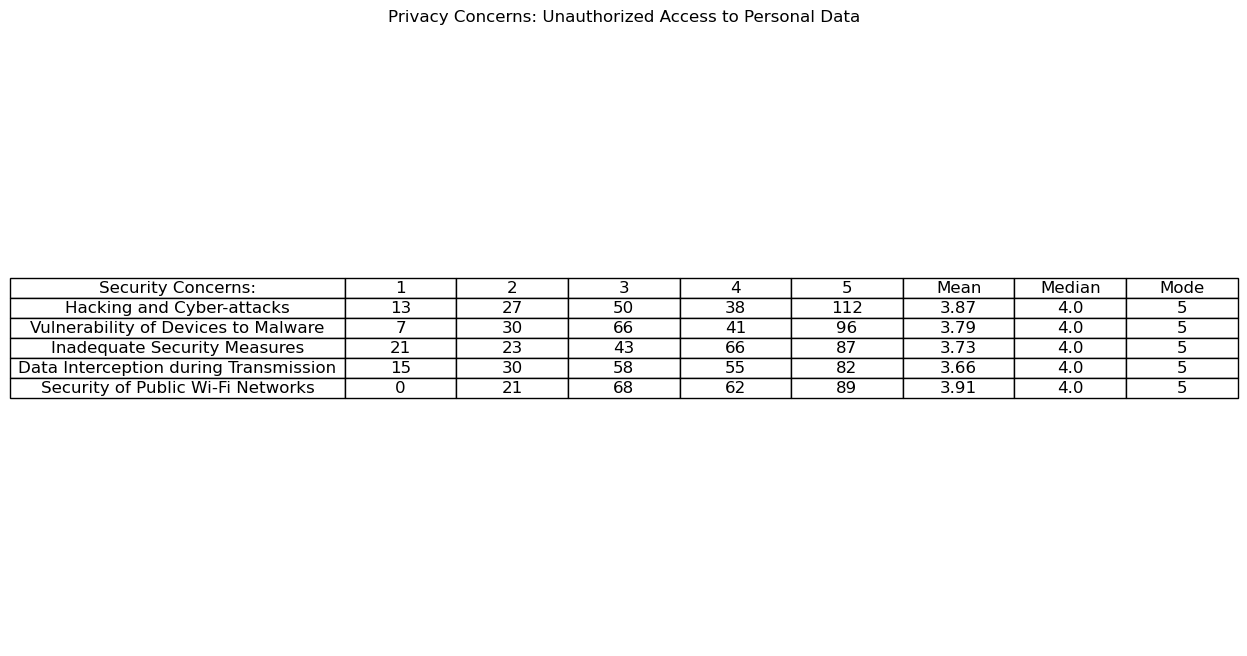

                      Security Concerns:   1   2   3   4    5  Mean  Median  \
0              Hacking and Cyber-attacks  13  27  50  38  112  3.87     4.0   
1    Vulnerability of Devices to Malware   7  30  66  41   96  3.79     4.0   
2           Inadequate Security Measures  21  23  43  66   87  3.73     4.0   
3  Data Interception during Transmission  15  30  58  55   82  3.66     4.0   
4      Security of Public Wi-Fi Networks   0  21  68  62   89  3.91     4.0   

   Mode  
0     5  
1     5  
2     5  
3     5  
4     5  


In [31]:
# Extract the relevant columns (columns 26 to 31)
columns = df.iloc[:, 26:31]

# Rename the columns
new_column_names = {
    columns.columns[0]: 'Hacking and Cyber-attacks',
    columns.columns[1]: 'Vulnerability of Devices to Malware',
    columns.columns[2]: 'Inadequate Security Measures',
    columns.columns[3]: 'Data Interception during Transmission',
    columns.columns[4]: 'Security of Public Wi-Fi Networks'
}
columns = columns.rename(columns=new_column_names)

# Clean the data: fill NA values with 0, convert to integers
columns = columns.fillna(0)
columns = columns.astype(int)

# Prepare a list to store the statistics
table_data = [["Security Concerns:", "1", "2", "3", "4", "5", "Mean", "Median", "Mode"]]

# Calculate mean, median, mode, and count for each rating (1 to 5) for each column
for col in columns.columns:
    filtered_data = columns[col][columns[col] != 0]
    # Get the count of each rating from 1 to 5
    value_counts = columns[col].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)
    counts = value_counts.tolist()  # Convert to a list
    
    mean_rating = round(filtered_data.mean(), 2) if not filtered_data.empty else 'None'
    median_rating = filtered_data.median() if not filtered_data.empty else 'None'
    
    if not filtered_data.empty:
        mode_rating_series = filtered_data.mode()
        if not mode_rating_series.empty:
            mode_rating = mode_rating_series[0]
        else:
            mode_rating = 'None'
    else:
        mode_rating = 'None'
    
    table_data.append([col] + counts + [mean_rating, median_rating, mode_rating])

# Display the statistics in a table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
colWidths = [0.3] + [0.1]*8
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=colWidths)

# Customize the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Display the table
plt.title('Privacy Concerns: Unauthorized Access to Personal Data')
plt.show()

# Print the statistics for easier reading
print(pd.DataFrame(table_data[1:], columns=table_data[0]))